In [1]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", font_scale=1.5, style="white")
import scipy.stats as st

import scona as scn
from scona.scripts.visualisation_commands import view_corr_mat

In [2]:
#Sets path directory
import os
os.chdir('C:/Users/Emre/OneDrive/Penn State/Masters Data')

#loads dataset
area = pd.read_csv('Freesurfer_volume_nosub_subjrmv.csv')
area.head()

,lh_G&S_frontomargin_volume,lh_G&S_occipital_inf_volume,lh_G&S_paracentral_volume,lh_G&S_subcentral_volume,lh_G&S_transv_frontopol_volume,lh_G&S_cingul-Ant_volume,lh_G&S_cingul-Mid-Ant_volume,lh_G&S_cingul-Mid-Post_volume,lh_G_cingul-Post-dorsal_volume,lh_G_cingul-Post-ventral_volume,...,rh_S_parieto_occipital_volume,rh_S_pericallosal_volume,rh_S_postcentral_volume,rh_S_precentral-inf-part_volume,rh_S_precentral-sup-part_volume,rh_S_suborbital_volume,rh_S_subparietal_volume,rh_S_temporal_inf_volume,rh_S_temporal_sup_volume,rh_S_temporal_transverse_volume
0,1128,3306,2611,3530,1639,4197,2409,2006,1284,706,...,3483,1265,3148,1897,1786,284,1804,1789,9184,342
1,2475,2320,2924,3293,1309,3696,2514,2736,1820,720,...,2670,1430,3747,2897,2673,544,2032,2078,9417,404
2,2050,2866,2101,2690,1214,3835,2046,2166,1259,634,...,2594,1262,2220,2014,1983,342,1415,1789,8567,358
3,5382,2701,3127,3150,2086,2730,1569,1931,1885,627,...,4139,1095,3979,2614,2073,388,1698,2178,13010,474
4,1655,2014,1880,1632,1213,3218,1800,1538,601,326,...,1472,623,1505,1219,845,346,806,995,5757,171


In [3]:
#loads list of brain regions
names = []
with open('region_names_volume.txt') as f:
    names = f.readlines()
f.close()

names = [''.join(item.split()) for item in names]

In [4]:
print(names)

['lh_G&S_frontomargin_volume', 'lh_G&S_occipital_inf_volume', 'lh_G&S_paracentral_volume', 'lh_G&S_subcentral_volume', 'lh_G&S_transv_frontopol_volume', 'lh_G&S_cingul-Ant_volume', 'lh_G&S_cingul-Mid-Ant_volume', 'lh_G&S_cingul-Mid-Post_volume', 'lh_G_cingul-Post-dorsal_volume', 'lh_G_cingul-Post-ventral_volume', 'lh_G_cuneus_volume', 'lh_G_front_inf-Opercular_volume', 'lh_G_front_inf-Orbital_volume', 'lh_G_front_inf-Triangul_volume', 'lh_G_front_middle_volume', 'lh_G_front_sup_volume', 'lh_G_Ins_lg&S_cent_ins_volume', 'lh_G_insular_short_volume', 'lh_G_occipital_middle_volume', 'lh_G_occipital_sup_volume', 'lh_G_oc-temp_lat-fusifor_volume', 'lh_G_oc-temp_med-Lingual_volume', 'lh_G_oc-temp_med-Parahip_volume', 'lh_G_orbital_volume', 'lh_G_pariet_inf-Angular_volume', 'lh_G_pariet_inf-Supramar_volume', 'lh_G_parietal_sup_volume', 'lh_G_postcentral_volume', 'lh_G_precentral_volume', 'lh_G_precuneus_volume', 'lh_G_rectus_volume', 'lh_G_subcallosal_volume', 'lh_G_temp_sup-G_T_transv_volume'

In [5]:
#Creates residuals
covars = []

area_res = scn.create_residuals_df(area, names, covars)
area_res.head()

,lh_G&S_frontomargin_volume,lh_G&S_occipital_inf_volume,lh_G&S_paracentral_volume,lh_G&S_subcentral_volume,lh_G&S_transv_frontopol_volume,lh_G&S_cingul-Ant_volume,lh_G&S_cingul-Mid-Ant_volume,lh_G&S_cingul-Mid-Post_volume,lh_G_cingul-Post-dorsal_volume,lh_G_cingul-Post-ventral_volume,...,rh_S_parieto_occipital_volume,rh_S_pericallosal_volume,rh_S_postcentral_volume,rh_S_precentral-inf-part_volume,rh_S_precentral-sup-part_volume,rh_S_suborbital_volume,rh_S_subparietal_volume,rh_S_temporal_inf_volume,rh_S_temporal_sup_volume,rh_S_temporal_transverse_volume
0,-947.181818,222.795455,18.431818,596.113636,113.25,209.568182,275.5,-143.568182,-120.886364,-63.659091,...,587.318182,31.25,-193.159091,-439.909091,-113.886364,-156.954545,36.454545,60.295455,380.75,-37.568182
1,399.818182,-763.204545,331.431818,359.113636,-216.75,-291.431818,380.5,586.431818,415.113636,-49.659091,...,-225.681818,196.25,405.840909,560.090909,773.113636,103.045455,264.454545,349.295455,613.75,24.431818
2,-25.181818,-217.204545,-491.568182,-243.886364,-311.75,-152.431818,-87.5,16.431818,-145.886364,-135.659091,...,-301.681818,28.25,-1121.159091,-322.909091,83.113636,-98.954545,-352.545455,60.295455,-236.25,-21.568182
3,3306.818182,-382.204545,534.431818,216.113636,560.25,-1257.431818,-564.5,-218.568182,480.113636,-142.659091,...,1243.318182,-138.75,637.840909,277.090909,173.113636,-52.954545,-69.545455,449.295455,4206.75,94.431818
4,-420.181818,-1069.204545,-712.568182,-1301.886364,-312.75,-769.431818,-333.5,-611.568182,-803.886364,-443.659091,...,-1423.681818,-610.75,-1836.159091,-1117.909091,-1054.886364,-94.954545,-961.545455,-733.704545,-3046.25,-208.568182


In [6]:
#Creates correlation matrix
M = scn.create_corrmat(area_res)
M.head()

,lh_G&S_frontomargin_volume,lh_G&S_occipital_inf_volume,lh_G&S_paracentral_volume,lh_G&S_subcentral_volume,lh_G&S_transv_frontopol_volume,lh_G&S_cingul-Ant_volume,lh_G&S_cingul-Mid-Ant_volume,lh_G&S_cingul-Mid-Post_volume,lh_G_cingul-Post-dorsal_volume,lh_G_cingul-Post-ventral_volume,...,rh_S_parieto_occipital_volume,rh_S_pericallosal_volume,rh_S_postcentral_volume,rh_S_precentral-inf-part_volume,rh_S_precentral-sup-part_volume,rh_S_suborbital_volume,rh_S_subparietal_volume,rh_S_temporal_inf_volume,rh_S_temporal_sup_volume,rh_S_temporal_transverse_volume
lh_G&S_frontomargin_volume,1.000000,0.123421,0.088447,0.274980,0.510781,0.088322,-0.157972,0.050803,0.351802,0.025367,...,0.374921,0.061427,0.390150,0.344119,0.190124,0.082250,0.094422,0.341680,0.442214,0.319116
lh_G&S_occipital_inf_volume,0.123421,1.000000,0.355181,0.185536,0.276828,0.149700,0.153060,0.129389,0.105219,-0.165308,...,0.364397,0.268521,0.431013,0.287743,0.260517,0.224803,0.372548,0.198395,0.185605,0.108059
lh_G&S_paracentral_volume,0.088447,0.355181,1.000000,0.229534,0.169582,-0.059533,0.353465,0.493272,0.128811,-0.222174,...,0.301198,0.072915,0.498517,0.314112,0.127523,0.229683,0.402507,0.129788,0.046060,0.272921
lh_G&S_subcentral_volume,0.274980,0.185536,0.229534,1.000000,0.637714,0.313927,0.280824,0.472104,0.622933,0.253022,...,0.492228,0.192554,0.587330,0.375838,0.450787,0.021650,0.394769,0.479767,0.296274,0.468807
lh_G&S_transv_frontopol_volume,0.510781,0.276828,0.169582,0.637714,1.000000,0.317930,-0.003522,0.123491,0.400153,0.182364,...,0.368153,0.237458,0.669336,0.383559,0.265386,0.025413,0.280582,0.168020,0.289737,0.436428


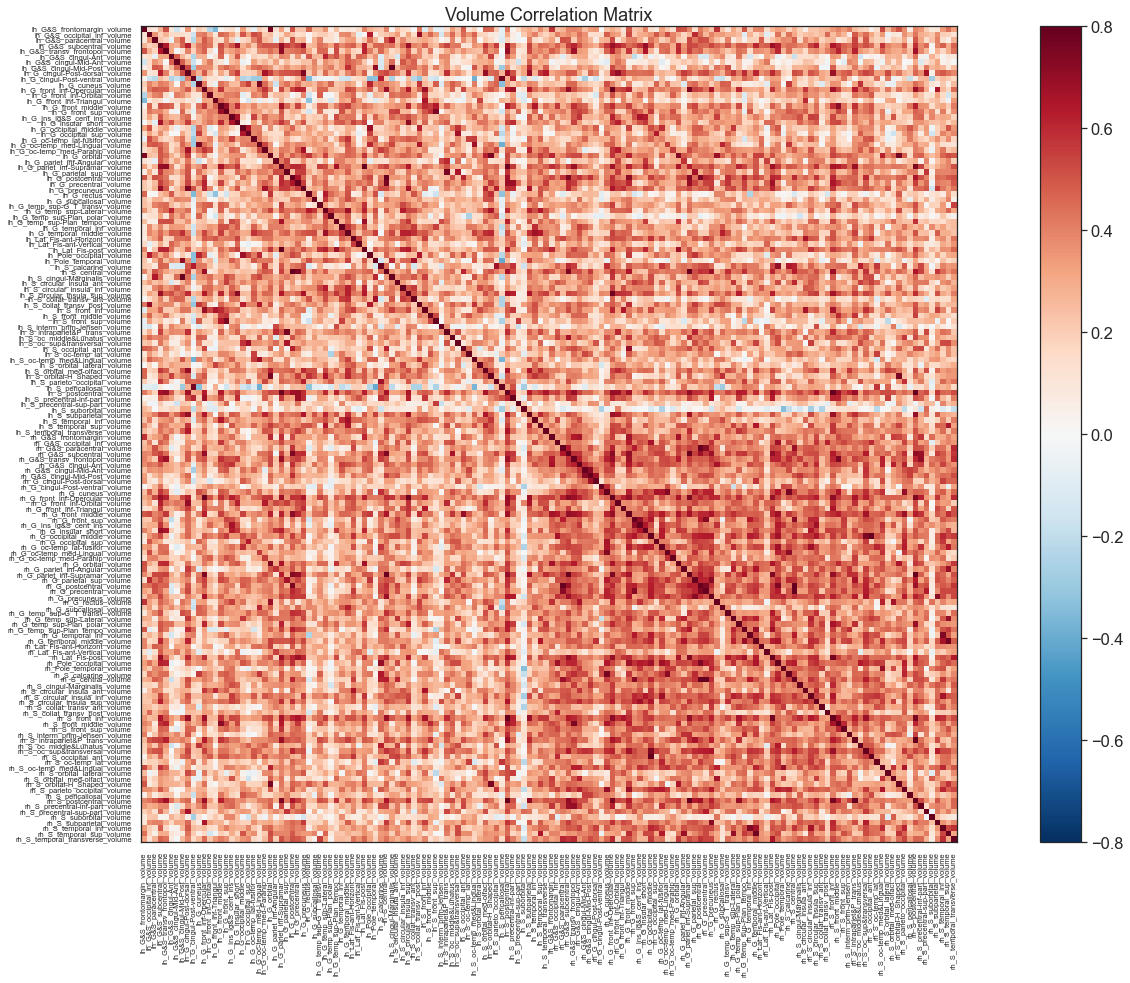

In [7]:
#Creates a correlation matrix graph
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
im = ax.imshow(M, cmap = "RdBu_r", vmin=-0.8, vmax=0.8)
ax.set_title("Volume Correlation Matrix")

#Sets axis lables
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names, rotation=90, fontsize=7.5)
ax.set_yticklabels(names,fontsize=7.5)

fig.colorbar(im, orientation="vertical", fraction = 0.05)
plt.show()

In [8]:
#Creates SCN using the correlation matrix
G = scn.BrainNetwork(network=M, parcellation=names)

#Obtains weight data from an edge
G.edges[0,1]

{'weight': 0.12342109363842972}

In [9]:
#Binarizes the graph by thresholding the nodes at the top 10%
G10 = G.threshold(10)

In [10]:
#Prompt to test if a particular node still exists
try:
    G10.edges[(0,1)]
except KeyError:
    print("This edge does not exist!")

This edge does not exist!


In [11]:
#Calculates the network measures and prints them out
G10.calculate_nodal_measures()
G10_measures = G10.report_nodal_measures()
G10_measures

,name,module,degree,closeness,betweenness,shortest_path_length,clustering,participation_coefficient
0,lh_G&S_frontomargin_volume,0,4,0.352518,0.000013,2.817568,0.833333,0.4375
1,lh_G&S_occipital_inf_volume,1,4,0.371212,0.00001,2.675676,0.833333,0.4375
2,lh_G&S_paracentral_volume,2,4,0.388889,0.000164,2.554054,0.666667,0.4375
3,lh_G&S_subcentral_volume,3,35,0.501706,0.014615,1.97973,0.430252,0.947755
4,lh_G&S_transv_frontopol_volume,2,15,0.453704,0.000474,2.189189,0.780952,0.462222
...,...,...,...,...,...,...,...,...
143,rh_S_suborbital_volume,0,1,0.270718,0.0,3.668919,0,0.0
144,rh_S_subparietal_volume,2,11,0.436202,0.00025,2.277027,0.818182,0.595041
145,rh_S_temporal_inf_volume,4,17,0.444109,0.007651,2.236486,0.389706,0.221453
146,rh_S_temporal_sup_volume,4,13,0.438806,0.00277,2.263514,0.397436,0.52071


In [12]:
#Extracts values from the right orbital inferior frontal gyrus
print(G10_measures.loc[86])

#Extracts values from the right middle frontal gyrus
print(G10_measures.loc[88])

name                         rh_G_front_inf-Orbital_volume
module                                                   3
degree                                                  16
closeness                                         0.429825
betweenness                                       0.009118
shortest_path_length                              2.310811
clustering                                             0.5
participation_coefficient                         0.683594
Name: 86, dtype: object
name                         rh_G_front_middle_volume
module                                              2
degree                                             47
closeness                                    0.542435
betweenness                                  0.072528
shortest_path_length                         1.831081
clustering                                   0.296022
participation_coefficient                    0.780896
Name: 88, dtype: object


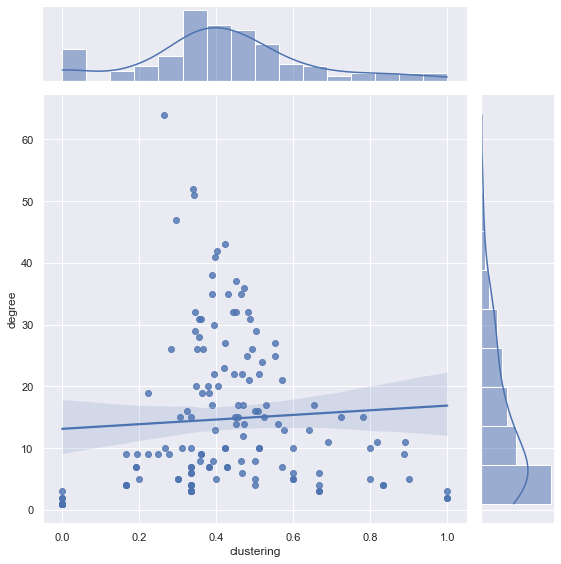

(0.06427833108581055, 0.43765901586403916)

In [13]:
#Creates a regression plot
nodal_df = G10.report_nodal_measures(columns=['degree', 'clustering'])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(data=nodal_df, y='degree', x='clustering', kind='reg', height=8)
plt.show()
st.pearsonr(nodal_df['degree'], nodal_df['clustering'])

In [14]:
#Calculates Global measures
G10.calculate_global_measures()

{'average_clustering': 0.4158731581934896,
 'average_shortest_path_length': 2.4728810443096156,
 'assortativity': 0.09838633823350637,
 'modularity': 0.2840225589316609,
 'efficiency': 0.46468713611572376}

In [15]:
#Creates an initial brain bundle
brain_bundle = scn.GraphBundle([G10], ['surfarea_cost10'])

In [16]:
#Test to see if a dictionary like object has been created
brain_bundle

{'surfarea_cost10': <scona.classes.BrainNetwork at 0x2bf9ac05760>}

In [17]:
#Creates randomized graphs using the observed brain network as the baseline
brain_bundle.create_random_graphs('surfarea_cost10', 44)

        Creating 44 random graphs - may take a little while


In [18]:
#Test to see if the randomized graphs have been created
brain_bundle

{'surfarea_cost10': <scona.classes.BrainNetwork at 0x2bf9ac05760>,
 'surfarea_cost10_R0': <scona.classes.BrainNetwork at 0x2bf9b2418e0>,
 'surfarea_cost10_R1': <scona.classes.BrainNetwork at 0x2bf9b472eb0>,
 'surfarea_cost10_R2': <scona.classes.BrainNetwork at 0x2bf9adc6fd0>,
 'surfarea_cost10_R3': <scona.classes.BrainNetwork at 0x2bf9b485df0>,
 'surfarea_cost10_R4': <scona.classes.BrainNetwork at 0x2bf9adcb100>,
 'surfarea_cost10_R5': <scona.classes.BrainNetwork at 0x2bf9b472d60>,
 'surfarea_cost10_R6': <scona.classes.BrainNetwork at 0x2bf9b472820>,
 'surfarea_cost10_R7': <scona.classes.BrainNetwork at 0x2bf9b472ca0>,
 'surfarea_cost10_R8': <scona.classes.BrainNetwork at 0x2bf9b472910>,
 'surfarea_cost10_R9': <scona.classes.BrainNetwork at 0x2bf9b472cd0>,
 'surfarea_cost10_R10': <scona.classes.BrainNetwork at 0x2bf9b241610>,
 'surfarea_cost10_R11': <scona.classes.BrainNetwork at 0x2bf9b241640>,
 'surfarea_cost10_R12': <scona.classes.BrainNetwork at 0x2bf9b241850>,
 'surfarea_cost10_R1

In [19]:
#Reports on the global measures of the randomized graphs
average_global = brain_bundle.report_global_measures()
average_global

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
surfarea_cost10,0.415873,2.472881,0.098386,0.284023,0.464687
surfarea_cost10_R0,0.282995,2.219526,-0.126825,0.179477,0.497763
surfarea_cost10_R1,0.275345,2.241037,-0.111257,0.179102,0.495364
surfarea_cost10_R2,0.278274,2.210057,-0.147292,0.179647,0.499356
surfarea_cost10_R3,0.272752,2.204357,-0.187069,0.178400,0.500314
surfarea_cost10_R4,0.295892,2.225501,-0.132054,0.173284,0.497153
surfarea_cost10_R5,0.261699,2.200956,-0.134755,0.177184,0.500467
surfarea_cost10_R6,0.263167,2.203162,-0.161244,0.165920,0.500378
surfarea_cost10_R7,0.288664,2.209597,-0.153567,0.183118,0.499579
surfarea_cost10_R8,0.317062,2.208954,-0.171680,0.181500,0.500167


In [20]:
#Removes the first row due to outlier data (the observed graph)
average_global_noout = average_global.drop('surfarea_cost10')
average_global_noout

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
surfarea_cost10_R0,0.282995,2.219526,-0.126825,0.179477,0.497763
surfarea_cost10_R1,0.275345,2.241037,-0.111257,0.179102,0.495364
surfarea_cost10_R2,0.278274,2.210057,-0.147292,0.179647,0.499356
surfarea_cost10_R3,0.272752,2.204357,-0.187069,0.178400,0.500314
surfarea_cost10_R4,0.295892,2.225501,-0.132054,0.173284,0.497153
surfarea_cost10_R5,0.261699,2.200956,-0.134755,0.177184,0.500467
surfarea_cost10_R6,0.263167,2.203162,-0.161244,0.165920,0.500378
surfarea_cost10_R7,0.288664,2.209597,-0.153567,0.183118,0.499579
surfarea_cost10_R8,0.317062,2.208954,-0.171680,0.181500,0.500167
surfarea_cost10_R9,0.305312,2.217687,-0.144355,0.175129,0.498825


In [21]:
#Loads the neuropsych data
neuropsych = pd.read_csv('Neuropsych_data_wcit.csv')
neuropsych.head()

,Participant ID:,Inhibition: Time (seconds),Inhibition Scaled Score
0,P06,97,5
1,P07,49,14
2,P08,149,1
3,P101,80,6
4,P107,59,3


In [22]:
#Adding the inhibition scaled score and inhibition time columns from the neuropsych dataset into the random network graphs dataframe
average_global_noout['Inhibition Scaled Score'] = neuropsych['Inhibition Scaled Score'].values
average_global_noout['Inhibition: Time (seconds)'] = neuropsych['Inhibition: Time (seconds)'].values
average_global_noout

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency,Inhibition Scaled Score,Inhibition: Time (seconds)
surfarea_cost10_R0,0.282995,2.219526,-0.126825,0.179477,0.497763,5,97
surfarea_cost10_R1,0.275345,2.241037,-0.111257,0.179102,0.495364,14,49
surfarea_cost10_R2,0.278274,2.210057,-0.147292,0.179647,0.499356,1,149
surfarea_cost10_R3,0.272752,2.204357,-0.187069,0.178400,0.500314,6,80
surfarea_cost10_R4,0.295892,2.225501,-0.132054,0.173284,0.497153,3,59
surfarea_cost10_R5,0.261699,2.200956,-0.134755,0.177184,0.500467,2,99
surfarea_cost10_R6,0.263167,2.203162,-0.161244,0.165920,0.500378,2,103
surfarea_cost10_R7,0.288664,2.209597,-0.153567,0.183118,0.499579,8,72
surfarea_cost10_R8,0.317062,2.208954,-0.171680,0.181500,0.500167,10,68
surfarea_cost10_R9,0.305312,2.217687,-0.144355,0.175129,0.498825,8,71


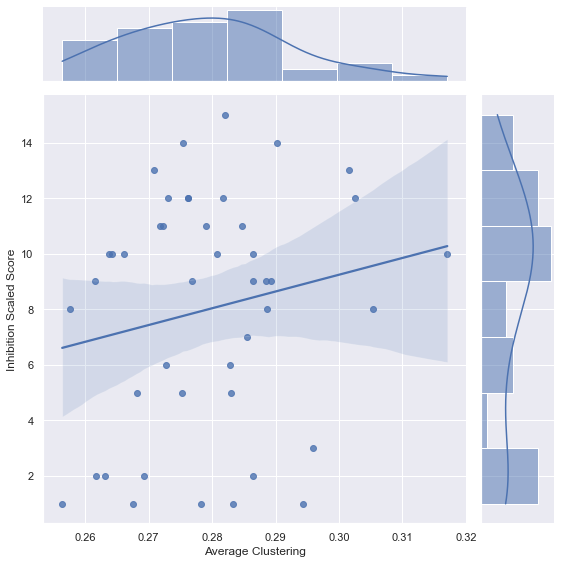

(0.189082879790675, 0.21897746476706412)

In [24]:
#Creates a regression plot for the scaled score vs clustering
sns.set(style="darkgrid", color_codes=True)
l = sns.jointplot(data=average_global_noout, y='Inhibition Scaled Score', x='average_clustering', kind='reg', height=8)
l.ax_joint.set_xlabel('Average Clustering')
plt.show()
st.pearsonr(average_global_noout['average_clustering'], average_global_noout['Inhibition Scaled Score'])

In [25]:
#Creates a regression model for scaled score vs clustering
import statsmodels.api as sm

#Sets variables
Y1 = average_global_noout['Inhibition Scaled Score']
X1= average_global_noout['average_clustering']

#Adds constant
X1 = sm.add_constant(X1)

#Prints out the results of the regression model
model1 = sm.OLS(Y1, X1, missing='drop')
results1= model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Inhibition Scaled Score   R-squared:                       0.036
Model:                                 OLS   Adj. R-squared:                  0.013
Method:                      Least Squares   F-statistic:                     1.557
Date:                     Mon, 06 Jun 2022   Prob (F-statistic):              0.219
Time:                             23:28:51   Log-Likelihood:                -124.49
No. Observations:                       44   AIC:                             253.0
Df Residuals:                           42   BIC:                             256.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.8583     13.524     -0.655      0.516     -36.151      18.434
average_clustering    60.3372     48.351      1.248      0.219     -37.238     157.913
==============================================================================
Omnibus:                        6.342   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.998
Skew:                          -0.375   Prob(JB):                        0.223
Kurtosis:                       1.964   Cond. No.                         82.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Calculates the standard error of the estimate for score vs clustering
np.sqrt(results1.scale)

4.193571358584442

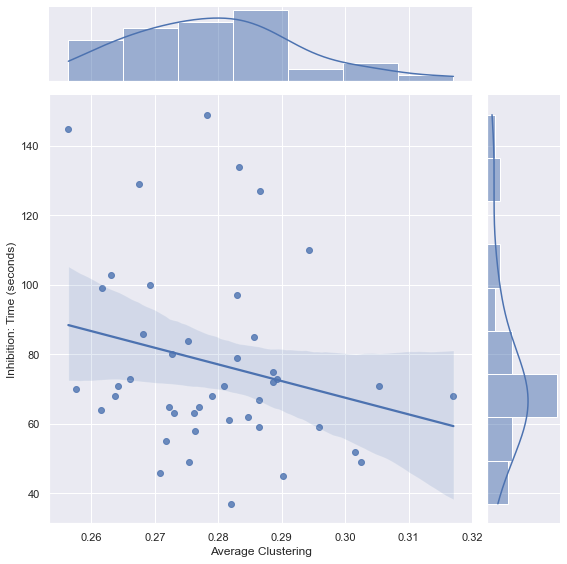

(-0.23682539137468672, 0.12166823930685987)

In [27]:
#Creates a regression plot for score vs inhibition time
sns.set(style="darkgrid", color_codes=True)
m = sns.jointplot(data=average_global_noout, y='Inhibition: Time (seconds)', x='average_clustering', kind='reg', height=8)
m.ax_joint.set_xlabel('Average Clustering')
plt.show()
st.pearsonr(average_global_noout['average_clustering'], average_global_noout['Inhibition: Time (seconds)'])

In [28]:
#Creates regression model for the clustering vs time data
import statsmodels.api as sm

#Sets variables
Y2 = average_global_noout['Inhibition: Time (seconds)']
X2= average_global_noout['average_clustering']

#Adds constant
X2 = sm.add_constant(X2)

#Prints out the results of the regression model
model2 = sm.OLS(Y2, X2, missing='drop')
results2= model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Inhibition: Time (seconds)   R-squared:                       0.056
Model:                                    OLS   Adj. R-squared:                  0.034
Method:                         Least Squares   F-statistic:                     2.496
Date:                        Mon, 06 Jun 2022   Prob (F-statistic):              0.122
Time:                                23:29:16   Log-Likelihood:                -205.29
No. Observations:                          44   AIC:                             414.6
Df Residuals:                              42   BIC:                             418.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                211.3017     84.849      2.490      0.017      40.070     382.533
average_clustering  -479.2106    303.347     -1.580      0.122   -1091.390     132.968
==============================================================================
Omnibus:                       10.213   Durbin-Watson:                   2.777
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.795
Skew:                           1.113   Prob(JB):                      0.00746
Kurtosis:                       3.626   Cond. No.                         82.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Calculates the standard error of the estimate for the clustering vs time data
np.sqrt(results2.scale)

26.31003053317768

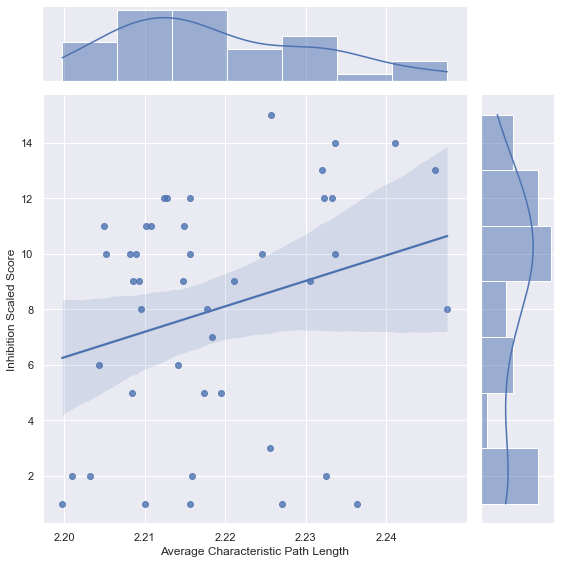

(0.2651021789095179, 0.08201137155104964)

In [30]:
#Creates a regression plot for the scaled score vs path
sns.set(style="darkgrid", color_codes=True)
n = sns.jointplot(data=average_global_noout, y='Inhibition Scaled Score', x='average_shortest_path_length', kind='reg', height=8)
n.ax_joint.set_xlabel('Average Characteristic Path Length')
plt.show()
st.pearsonr(average_global_noout['average_shortest_path_length'], average_global_noout['Inhibition Scaled Score'])

In [31]:
#Creates a regression model for scaled score vs path
import statsmodels.api as sm

#Sets variables
Y3 = average_global_noout['Inhibition Scaled Score']
X3= average_global_noout['average_shortest_path_length']

#Adds constant
X3 = sm.add_constant(X3)

#Prints out the results of the regression model
model3 = sm.OLS(Y3, X3, missing='drop')
results3= model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Inhibition Scaled Score   R-squared:                       0.070
Model:                                 OLS   Adj. R-squared:                  0.048
Method:                      Least Squares   F-statistic:                     3.175
Date:                     Mon, 06 Jun 2022   Prob (F-statistic):             0.0820
Time:                             23:29:47   Log-Likelihood:                -123.68
No. Observations:                       44   AIC:                             251.4
Df Residuals:                           42   BIC:                             254.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -195.5990    114.267     -1.712      0.094    -426.199      35.001
average_shortest_path_length    91.7588     51.497      1.782      0.082     -12.167     195.685
==============================================================================
Omnibus:                        5.566   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.880
Skew:                          -0.575   Prob(JB):                        0.144
Kurtosis:                       2.110   Cond. No.                         491.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Calculates the standard error of the estimate for the score vs path data
np.sqrt(results3.scale)

4.117807320502331

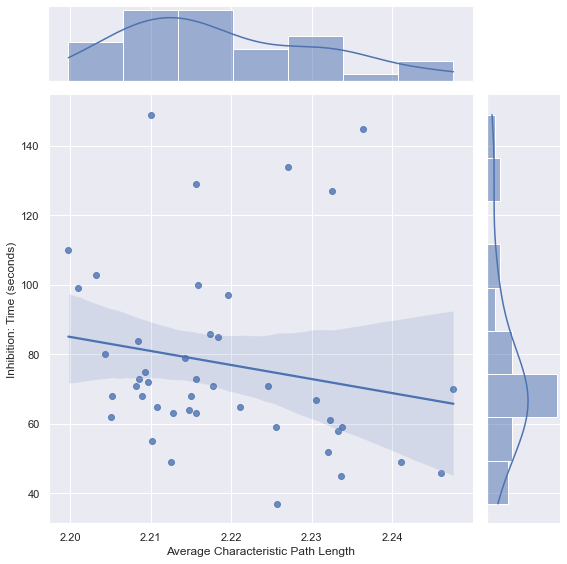

(-0.18431101380518056, 0.23104223385783668)

In [33]:
#Creates a regression plot for the time vs path
sns.set(style="darkgrid", color_codes=True)
o = sns.jointplot(data=average_global_noout, y='Inhibition: Time (seconds)', x='average_shortest_path_length', kind='reg', height=8)
o.ax_joint.set_xlabel('Average Characteristic Path Length')
plt.show()
st.pearsonr(average_global_noout['average_shortest_path_length'], average_global_noout['Inhibition: Time (seconds)'])

In [34]:
#Creates a regression model for time vs path
import statsmodels.api as sm

#Sets variables
Y4 = average_global_noout['Inhibition: Time (seconds)']
X4= average_global_noout['average_shortest_path_length']

#Adds constant
X4 = sm.add_constant(X4)

#Prints out the results of the regression model
model4 = sm.OLS(Y4, X4, missing='drop')
results4= model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Inhibition: Time (seconds)   R-squared:                       0.034
Model:                                    OLS   Adj. R-squared:                  0.011
Method:                         Least Squares   F-statistic:                     1.477
Date:                        Mon, 06 Jun 2022   Prob (F-statistic):              0.231
Time:                                23:30:33   Log-Likelihood:                -205.80
No. Observations:                          44   AIC:                             415.6
Df Residuals:                              42   BIC:                             419.2
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          975.0015    738.592      1.320      0.194    -515.538    2465.541
average_shortest_path_length  -404.5303    332.867     -1.215      0.231   -1076.282     267.222
==============================================================================
Omnibus:                       15.952   Durbin-Watson:                   2.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.891
Skew:                           1.415   Prob(JB):                     0.000130
Kurtosis:                       4.325   Cond. No.                         491.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Calculates the standard error of the estimate for the time vs path data
np.sqrt(results4.scale)

26.616465460611586